<a href="https://colab.research.google.com/github/shivamkalia/NLP/blob/main/InformationExtractionFromPDFUsingNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary Imports and Installs

In [88]:
!pip install wikipedia
!pip install PyPDF2
!pip install bs4


In [87]:

import spacy
import PyPDF2
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import requests
from bs4 import *
import wikipedia
from textblob import TextBlob


In [89]:
nlp = spacy.load("en_core_web_sm")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Keyword detector

In [90]:
def perform_named_entity_recognition(preprocessed_text):
    doc = nlp(preprocessed_text)
    entities = []
    for ent in doc.ents:
        if ent.label_ in ['ORG','PERSON']:
            entities.append(ent.text)
    return entities


def extract_keywords_tfidf(preprocessed_text):
    # Tokenizing the text and removing the stop words
    token = word_tokenize(preprocessed_text)
    stop_words = set(stopwords.words('english'))
    filtered_token = [words.lower() for words in token if words.lower() not in stop_words]

    # Lemmatizing the newly created tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_token = [lemmatizer.lemmatize(words) for words in filtered_token]

    # Creating a string from the tokens
    processed_text = ' '.join(lemmatized_token)

    #TF-IDF calculations
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([processed_text])
    feature_names = vectorizer.get_feature_names_out()

    # Using the TF-IDF scores to sort features
    sorted_indices = tfidf_matrix.toarray()[0].argsort()[::-1]
    keywords = [feature_names[idx] for idx in sorted_indices]
    return keywords

def get_top_keywords_tfidf(keywords, n):
    top_keywords = keywords[:n]
    return top_keywords

# Sentiment Analysis

In [43]:
def sentiment_analysis(preprocessed_text):
  sentiment_blob = TextBlob(preprocessed_text)
  return sentiment_blob.sentiment

# Word Clouds

In [79]:
def keywords_tfidf_visualize(keywords):
    # Creating a string from the TFIDF keywords
    text = ' '.join(keywords)

    # Word cloud
    wordcloud = WordCloud(background_color='#f0f0f0',
                          width=1920,
                          height=1080).generate(text)

    # Plotting the Wordcloud
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(" Word Cloud representing TF-IDF")
    plt.axis('off')
    plt.show()


def keywords_ner_visualize(entities):
    # Creating a string from the named entity recogniction keywords
    text = ' '.join(entities)

    # Word cloud
    wordcloud = WordCloud(background_color='#f0f0f0',
                          width=1920,
                          height=1080).generate(text)

    # Plotting the Wordcloud
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(" Word Cloud representing Names entity recognition Keywords")
    plt.axis('off')
    plt.show()


# Meanings of Top Keywords

In [45]:
def extract_wikipedia_defination(top_keywords):

    definitions = []
    for keyword in top_keywords:
        try:
            wikepedia_definations = wikipedia.summary(keyword, sentences=3)
            definitions.append(wikepedia_definations)

        except wikipedia.exceptions.DisambiguationError as de:
            #Disambiguation error
            print(f"DisambiguationError:'{keyword}' too ambigious by spacy")
        except wikipedia.exceptions.PageError:
            #Page not found error
            print(f"PageError: '{keyword}'  defination not found on Wikipedia")
    return definitions

# Summary from a PDF

In [92]:

def frequency_matrix(sentences, stop_words):
    frequency_matrix = {}
    for sent in sentences:
        freq_table = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            if word in stop_words:
                continue
            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1
        frequency_matrix[sent[:15]] = freq_table
    return frequency_matrix

def tf_matrix(frequency_matrix):
    tf_matrix = {}
    for sent, f_table in frequency_matrix.items():
        tf_table = {}
        count_words_in_sentence = len(f_table)
        for word, count in f_table.items():
            tf_table[word] = count / count_words_in_sentence
        tf_matrix[sent] = tf_table
    return tf_matrix

def sentence_score(tf_matrix):
    sentence_scores = {}
    for sent, tf_table in tf_matrix.items():
        total_score_per_sentence = 0
        for word, tf in tf_table.items():
            total_score_per_sentence += tf
        sentence_scores[sent] = total_score_per_sentence
    return sentence_scores


def generate_summary_for_text(preprocessed_texts, sent):
    sentences = sent_tokenize(preprocessed_texts)
    stop_words = stopwords.words('english')
    frequency_matrix_output = frequency_matrix(sentences, stop_words)
    tf_matrix_output = tf_matrix(frequency_matrix_output)
    sentence_scores = sentence_score(tf_matrix_output)

    ranked_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)
    summary = '. '.join(ranked_sentences[:sent])

    return summary



In [91]:
def extract_text_from_pdf(file_path):
    preprocessed_text = ''
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            preprocessed_text += page.extract_text()
    return preprocessed_text


Below are all the results of all the keyword summary and visualization for the same attached to help undertsand the pdf
Named entity Recognition Keywords
['Riot', 'Rioters', 'Rioter', 'Riot', 'Riot', 'Patty Dingle', 'Diversity & Inclusion', 'Jeffrey Burrell', 'Social Impact01 PEOPLE  ..................................................... 04', 'Numbers', 'Social Impact Fund', 'Trust & Safety  ........................................................... 23\n', 'Community', 'Sustainability', 'NEXT', 'Willump', 'Rioters', 'Riot', 'Human Rights Campaign Certified  - Score', 'Rioter Approval', 'Latinx', 'Alaska NativeWomen', 'Cisgender Woman', 'Transgender Woman', 'URM', 'Latinx', 'Alaska Native', 'Latinx', 'Other Pacific Islander.03', 'Alaska Native', 'Numbers', 'NEXT', 'Riot', 'Riot', 'Riot', 'D&I', 'Riot', 'Riot', 'Inclusion Index Score\nEvery year', 'Riot', 'GRS', 'Rioter', 'Riot', 'Rioters', 'Riot', 'D&I', 'NEXT', 'Riot', 'Riot', 'Riot', 'Rioters', 'NEXT', 'Riot', 'Black, Indigenous', 'BI

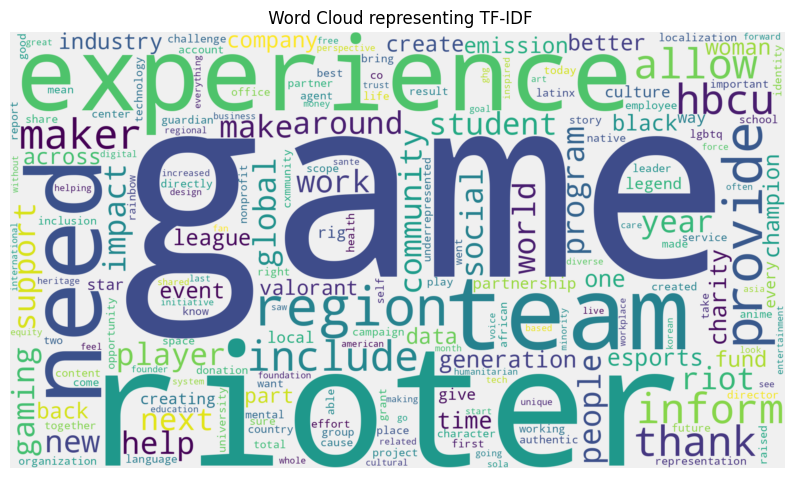

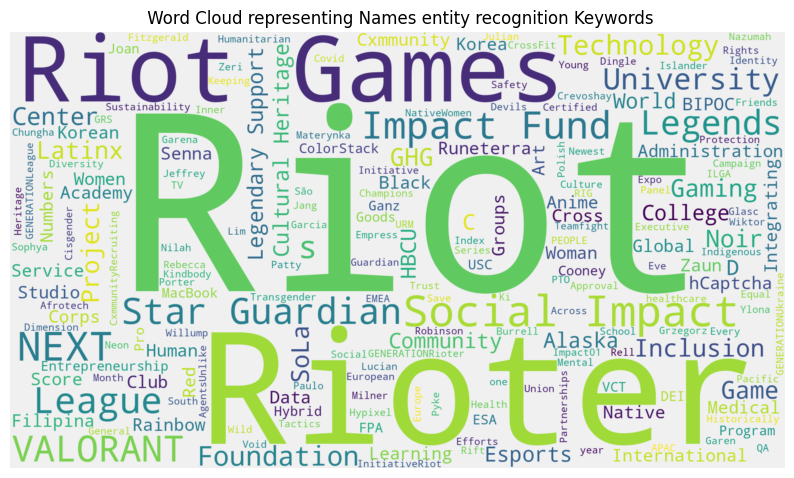

Sentiment(polarity=0.14110923619086876, subjectivity=0.3918905772987408)


In [93]:
def keyword_detection_visualization_and_wikipedia_definations(file_path):
    # Extracting the text from the PDF
    preprocessed_texts = extract_text_from_pdf(file_path)
    print("Below are all the results of all the keyword summary and visualization for the same attached to help undertsand the pdf")

    #  Named entity recognition (NER) Keywords
    entities = perform_named_entity_recognition(preprocessed_texts)
    print("Named entity Recognition Keywords")
    print(entities)


    # TF-IDF Keywords
    tfidf_keywords = extract_keywords_tfidf(preprocessed_texts)
    top_keywords = get_top_keywords_tfidf(tfidf_keywords, 10)
    print("TF-IDF Keywords")
    print(top_keywords)


  # Wikipedia defination
    defination = extract_wikipedia_defination(top_keywords)
    print(defination)


  # Generate summary
    generated_summary = generate_summary_for_text(preprocessed_texts, 500)
    print(generated_summary)


   # WordCloud
    keywords_tfidf_visualize(tfidf_keywords)
    keywords_ner_visualize(entities)

  # Sentiment Analysis of the pdf
    sentiment = sentiment_analysis(preprocessed_texts)
    print(sentiment)


# Calling the program finally
file_path = "/content/riot-impactreport-2022.pdf" # PDF path here
keyword_detection_visualization_and_wikipedia_definations(file_path)

